# EFC 3

#### a)

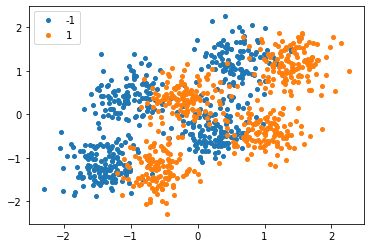

In [1]:
%matplotlib inline


import scipy.io as spio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import color_palette, JointGrid


train_mat = spio.loadmat('dados_treinamento.mat')

X_train = train_mat['X']

y_train = train_mat['y']

df = pd.DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train[:,0]))

groups = df.groupby('label')

# Plot
colors = color_palette(n_colors=len(groups))

fig, ax = plt.subplots()
# ax.set_color_cycle(colors)
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', linestyle='', ms=8, label=name)
ax.legend(numpoints=1, loc='upper left')

fig = plt.show()


In [2]:
%matplotlib inline

import tensorflow as tf
import scipy.io as spio
from sklearn.preprocessing import Binarizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

tf.enable_eager_execution()

# Training data
train_mat = spio.loadmat('dados_treinamento.mat')
x_train = train_mat['X']
y_train = train_mat['y']

# Encode values to 0 and 1
encoder = LabelEncoder()
encoder.fit(y_train.ravel())
y_train = encoder.transform(y_train.ravel())

# Validation data
validation_mat = spio.loadmat('dados_val.mat')
x_val = validation_mat['Xval']
y_val = validation_mat['yval']
y_val = encoder.transform(y_val.ravel())

testes_neuronios=[]
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, kernel_initializer='normal', activation='relu'),
    tf.keras.layers.Dense(1, kernel_initializer='normal', activation='sigmoid')
])

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose=1)]

history = model.fit(x_train, 
                    y_train,
                    callbacks=callbacks, # Early stopping
                    validation_data=(x_val, y_val), #validation data
                    epochs=400)

Instructions for updating:
Colocations handled automatically by placer.
Train on 1000 samples, validate on 1000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/400
1000/1000 [==============================] - 1s 708us/sample - loss: 0.6671 - acc: 0.5890 - val_loss: 0.6503 - val_acc: 0.5570
Epoch 2/400
1000/1000 [==============================] - 0s 159us/sample - loss: 0.6287 - acc: 0.5670 - val_loss: 0.6170 - val_acc: 0.5550
Epoch 3/400
1000/1000 [==============================] - 0s 166us/sample - loss: 0.5951 - acc: 0.5910 - val_loss: 0.5899 - val_acc: 0.6070
Epoch 4/400
1000/1000 [==============================] - 0s 154us/sample - loss: 0.5715 - acc: 0.6390 - val_loss: 0.5734 - val_acc: 0.6400
Epoch 5/400
1000/1000 [==============================] - 0s 132us/sample - loss: 0.5598 - acc: 0.6560 - val_loss: 0.5646 - val_acc: 0.6570
Epoch 6/400
1000/1000 [==============================] - 0s 135us/sample - loss: 0.5530 - acc: 0.6800 - val_loss: 0.5587 - val_acc: 0.662

Epoch 55/400
1000/1000 [==============================] - 0s 203us/sample - loss: 0.3107 - acc: 0.8760 - val_loss: 0.3434 - val_acc: 0.8640
Epoch 56/400
1000/1000 [==============================] - 0s 268us/sample - loss: 0.3091 - acc: 0.8780 - val_loss: 0.3416 - val_acc: 0.8630
Epoch 57/400
1000/1000 [==============================] - 0s 287us/sample - loss: 0.3106 - acc: 0.8770 - val_loss: 0.3406 - val_acc: 0.8610
Epoch 58/400
1000/1000 [==============================] - 0s 154us/sample - loss: 0.3082 - acc: 0.8760 - val_loss: 0.3415 - val_acc: 0.8640
Epoch 59/400
1000/1000 [==============================] - 0s 283us/sample - loss: 0.3063 - acc: 0.8750 - val_loss: 0.3383 - val_acc: 0.8620
Epoch 60/400
1000/1000 [==============================] - 0s 124us/sample - loss: 0.3058 - acc: 0.8790 - val_loss: 0.3372 - val_acc: 0.8620
Epoch 61/400
1000/1000 [==============================] - 0s 311us/sample - loss: 0.3052 - acc: 0.8740 - val_loss: 0.3399 - val_acc: 0.8610
Epoch 62/400
1000/10

1000/1000 [==============================] - 0s 192us/sample - loss: 0.2897 - acc: 0.8770 - val_loss: 0.3272 - val_acc: 0.8650
Epoch 114/400
1000/1000 [==============================] - 0s 123us/sample - loss: 0.2898 - acc: 0.8810 - val_loss: 0.3290 - val_acc: 0.8640
Epoch 115/400
1000/1000 [==============================] - 0s 152us/sample - loss: 0.2897 - acc: 0.8770 - val_loss: 0.3277 - val_acc: 0.8640
Epoch 116/400
1000/1000 [==============================] - 0s 121us/sample - loss: 0.2889 - acc: 0.8820 - val_loss: 0.3268 - val_acc: 0.8640
Epoch 117/400
1000/1000 [==============================] - 0s 130us/sample - loss: 0.2896 - acc: 0.8810 - val_loss: 0.3266 - val_acc: 0.8660
Epoch 118/400
1000/1000 [==============================] - 0s 134us/sample - loss: 0.2901 - acc: 0.8780 - val_loss: 0.3270 - val_acc: 0.8640
Epoch 119/400
1000/1000 [==============================] - ETA: 0s - loss: 0.2982 - acc: 0.876 - 0s 123us/sample - loss: 0.2918 - acc: 0.8770 - val_loss: 0.3269 - val_a

Epoch 171/400
1000/1000 [==============================] - 0s 185us/sample - loss: 0.2854 - acc: 0.8790 - val_loss: 0.3263 - val_acc: 0.8620
Epoch 172/400
1000/1000 [==============================] - 0s 288us/sample - loss: 0.2863 - acc: 0.8830 - val_loss: 0.3262 - val_acc: 0.8600
Epoch 173/400
1000/1000 [==============================] - 0s 274us/sample - loss: 0.2860 - acc: 0.8800 - val_loss: 0.3260 - val_acc: 0.8620
Epoch 174/400
1000/1000 [==============================] - 0s 220us/sample - loss: 0.2844 - acc: 0.8790 - val_loss: 0.3273 - val_acc: 0.8630
Epoch 175/400
1000/1000 [==============================] - 0s 340us/sample - loss: 0.2840 - acc: 0.8820 - val_loss: 0.3264 - val_acc: 0.8630
Epoch 176/400
1000/1000 [==============================] - 0s 205us/sample - loss: 0.2838 - acc: 0.8840 - val_loss: 0.3276 - val_acc: 0.8620
Epoch 177/400
1000/1000 [==============================] - 0s 202us/sample - loss: 0.2837 - acc: 0.8810 - val_loss: 0.3263 - val_acc: 0.8630
Epoch 178/400

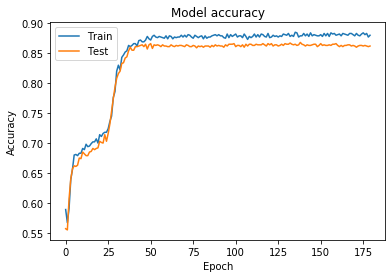

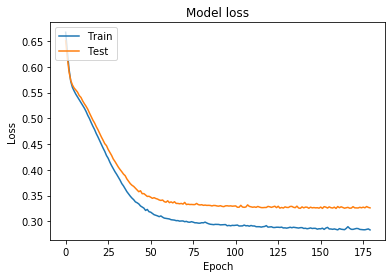

In [3]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Nesse modelo, escolheu-se utilizar 150 neurônios, com função de ativação relu para a camada intermediária e sigmoide para a saída, e como tínhamo um problema de classificação binária, escolheu-se como função custo a entropia cruzada. Além disso, utilizamos um algoritmo de early stopping, para previnir o sobretreinamento, com parâmetro de paciência de 20.

Observando a acurácia, pode-se observar que a partir de aproximadamente 30 épocas existe um distanciamente um pouco maior, do que o observado anteriormente, entre os dados de treinamento e de teste, que se mantém até o fim do treinamento. Conforme esperado, a curva da função custo diminui ao longo do tempo, porém para os dados de treinamento ela continua diminuindo conforme segue o treinamento e para os dados de validação ela alcança um platô, onde a diminuição da função custo é muito pequena.

#### b)

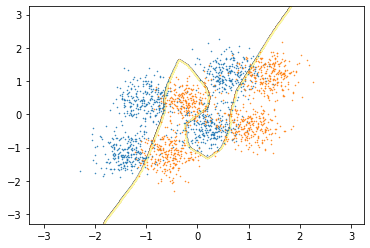

In [11]:
# -*- coding: utf-8 -*-

import scipy.io as spio
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from seaborn import color_palette, JointGrid

train_mat = spio.loadmat('dados_treinamento.mat')
test_mat = spio.loadmat('dados_val.mat')

X_train = np.concatenate((train_mat['X'], test_mat['Xval']))
Y_train = np.concatenate((train_mat['y'], test_mat['yval']))

df = pd.DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=Y_train[:,0]))

groups = df.groupby('label')

# Plot
colors = color_palette(n_colors=len(groups))

fig, ax = plt.subplots()
# ax.set_color_cycle(colors)
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y, marker='.', markersize=1, linestyle='', label=name)
# ax.legend(numpoints=1, loc='upper left')

# https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = model.predict_classes(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
Z = Z.reshape(xx.shape)
fig = plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
fig = plt.show()

Observando as regiões de decisão geradas pela rede treinada pode-se observar a semelhança com as do classificador de mínima taxa de erro, podendo-se dizer que o algoritmo obteve relativo sucesso na tarefa de comparação. Porém, observa-se nítidas diferenças entre as duas regiões de decisão, isso porque o modelo de rede neural não considera as informações sobre a distribuição dos dados, assim como o definido pelo MAP faz.

#### c)

In [5]:
import scipy.io as spio
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

test_mat = spio.loadmat('dados_val.mat')
x_test = test_mat['Xval']
y_test = test_mat['yval']
y_test = encoder.transform(y_test.ravel())
pred = model.predict_classes(x_test)

print("Accuracy: %.2f" % accuracy_score(y_test, pred))

Accuracy: 0.86


#### d)

In [7]:
import numpy as np

testes_neuronios=[]
for k in [i for i in range(1,30)]+[i for i in range(30,251,20)]:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(k, kernel_initializer='normal', activation='relu'), 
        tf.keras.layers.Dense(1, kernel_initializer='normal', activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', #binary_crossentropy, mean_absolute_error, 
                  optimizer='adam', # sgd, rmsprop, adagrad, adadelta, adam 
                  metrics=['accuracy'])
    callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose=0)]
    
    print("Training...%d neurons" % k)
    history = model.fit(x_train,
                        y_train, 
                        validation_data=(x_val, y_val), 
                        epochs=400, 
                        callbacks=callbacks, # Early stopping
                        verbose=0)
    loss, accuracy = model.evaluate(x_val, y_val)
    
    pred = model.predict_classes(x_test)
    cm = confusion_matrix(y_test, pred)
    acc_test = accuracy_score(y_test, pred)
    print("Accuracy: %.2f" % acc_test)
    
    testes_neuronios.append({'n':k, 
                             'loss':loss, 
                             'accuracy':accuracy, 
                             'history':history,
                             'cm_test': cm,
                             'acc_test':acc_test
                            })

Training...1 neurons
1000/1000 [==============================] - 0s 99us/sample - loss: 0.5637 - acc: 0.6540
Accuracy: 0.65
Training...2 neurons
1000/1000 [==============================] - 0s 40us/sample - loss: 0.5239 - acc: 0.7140
Accuracy: 0.71
Training...3 neurons
1000/1000 [==============================] - 0s 79us/sample - loss: 0.5256 - acc: 0.7070
Accuracy: 0.71
Training...4 neurons
1000/1000 [==============================] - 0s 46us/sample - loss: 0.5254 - acc: 0.7060
Accuracy: 0.71
Training...5 neurons
1000/1000 [==============================] - 0s 79us/sample - loss: 0.5606 - acc: 0.6580
Accuracy: 0.66
Training...6 neurons
1000/1000 [==============================] - 0s 88us/sample - loss: 0.5122 - acc: 0.7210
Accuracy: 0.72
Training...7 neurons
1000/1000 [==============================] - 0s 78us/sample - loss: 0.5038 - acc: 0.6710
Accuracy: 0.67
Training...8 neurons
1000/1000 [==============================] - 0s 91us/sample - loss: 0.5550 - acc: 0.6560
Accuracy: 0.66


TypeError: can't pickle weakref objects

1 - acc:0.654
2 - acc:0.714
3 - acc:0.707
4 - acc:0.706
5 - acc:0.658
6 - acc:0.721
7 - acc:0.671
8 - acc:0.656
9 - acc:0.836
10 - acc:0.714
11 - acc:0.857
12 - acc:0.708
13 - acc:0.862
14 - acc:0.851
15 - acc:0.852
16 - acc:0.860
17 - acc:0.861
18 - acc:0.856
19 - acc:0.866
20 - acc:0.868
21 - acc:0.861
22 - acc:0.852
23 - acc:0.865
24 - acc:0.867
25 - acc:0.862
26 - acc:0.854
27 - acc:0.870
28 - acc:0.864
29 - acc:0.867
30 - acc:0.867
50 - acc:0.861
70 - acc:0.865
90 - acc:0.866
110 - acc:0.865
130 - acc:0.862
150 - acc:0.864
170 - acc:0.866
190 - acc:0.860
210 - acc:0.868
230 - acc:0.869
250 - acc:0.867


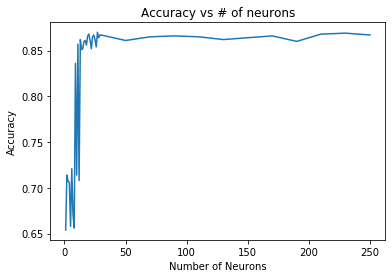

In [19]:
# print(testes_neuronios)
for nn in testes_neuronios:
    print("%d - acc:%.3f" % (nn['n'],nn['accuracy']))

# Plot training & validation loss values
plt.plot([nn['n'] for nn in testes_neuronios], [nn['accuracy'] for nn in testes_neuronios])
plt.title('Accuracy vs # of neurons')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neurons')
plt.show()

Pode-se observar que a acurácia é baixa para n variando de 1 a 8 neurônios; para n de 8 até 13 é possível observar que adicionar um neurônio pode piorar o desempenho da rede, o que pode-se ser explicado pela dificuldade no treinamento, onde provavelmente o algoritmo de treinamento encontrou um mínimo local, que não generalizava bem. 

Acima de 13 neurônios, verifica-se que a acurácia é muito próxima uma à outra, onde podemos concluir que acrescentar mais neurônios não melhora tanto na generalização do modelo, porém o melhor resultado obtido foi para 27 neurônios. Lembrando-se que foi utilizada no treinamento uma estratégia de early stopping, que para o treinamento após 20 épocas depois de iniciar a degradação da função de custo

#### e)

In [20]:
%matplotlib inline

import scipy.io as spio
from sklearn.preprocessing import Binarizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC

train_mat = spio.loadmat('dados_treinamento.mat')

x_train = train_mat['X']
y_train = train_mat['y']


clf = SVC(gamma='auto', 
          kernel='rbf')

clf.fit(x_train, y_train.ravel())

pred = clf.predict(x_train)

print("Accuracy: %.2f" % accuracy_score(y_train, pred))

Accuracy: 0.87


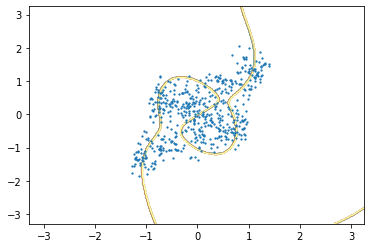

In [21]:
# -*- coding: utf-8 -*-

import scipy.io as spio
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from seaborn import color_palette, JointGrid

train_mat = spio.loadmat('dados_treinamento.mat')
test_mat = spio.loadmat('dados_val.mat')

X_train = np.concatenate((train_mat['X'], test_mat['Xval']))
y_train = np.concatenate((train_mat['y'], test_mat['yval']))

df = pd.DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=y_train[:,0]))

groups = df.groupby('label')

# Plot
colors = color_palette(n_colors=len(groups))

fig, ax = plt.subplots()
ax.margins(0.05)
# for name, group in groups:
#     ax.plot(group.x, group.y, marker='.', markersize=2.5, linestyle='', label=name)
# ax.legend(numpoints=1, loc='upper left')
ax.plot(clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1], 
        marker='.', 
        markersize=2.5,
        linestyle='');

# https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))



# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
Z = Z.reshape(xx.shape)
fig = plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
fig = plt.show()

#### f)

In [22]:
test_mat = spio.loadmat('dados_val.mat')
x_test = test_mat['Xval']
y_test = test_mat['yval']

pred = clf.predict(x_test)

print("Accuracy: %.2f" % accuracy_score(y_test, pred))

Accuracy: 0.85


#### g)

In [23]:
train_mat = spio.loadmat('dados_treinamento.mat')

x_train = train_mat['X']
y_train = train_mat['y']

for kernel in ['linear', 'rbf', 'sigmoid']:
    print("kernel: %s" % kernel)
    for C in ([10**i for i in range(-5,6)]):
        clf = SVC(
                C = C,
                gamma='auto', 
                kernel=kernel)
        clf.fit(x_train, y_train.ravel())

        pred = clf.predict(x_train)
        print("C: %.2E -- Accuracy of train: %.2f -- Accuracy of test: %.2f" % (C, 
                                             accuracy_score(y_train, clf.predict(x_train)),
                                             accuracy_score(y_test, clf.predict(x_test))))

kernel: linear
C: 1.00E-05 -- Accuracy of train: 0.51 -- Accuracy of test: 0.48
C: 1.00E-04 -- Accuracy of train: 0.51 -- Accuracy of test: 0.48
C: 1.00E-03 -- Accuracy of train: 0.69 -- Accuracy of test: 0.67
C: 1.00E-02 -- Accuracy of train: 0.60 -- Accuracy of test: 0.59
C: 1.00E-01 -- Accuracy of train: 0.66 -- Accuracy of test: 0.65
C: 1.00E+00 -- Accuracy of train: 0.67 -- Accuracy of test: 0.66
C: 1.00E+01 -- Accuracy of train: 0.68 -- Accuracy of test: 0.66
C: 1.00E+02 -- Accuracy of train: 0.68 -- Accuracy of test: 0.66
C: 1.00E+03 -- Accuracy of train: 0.68 -- Accuracy of test: 0.66
C: 1.00E+04 -- Accuracy of train: 0.68 -- Accuracy of test: 0.66
C: 1.00E+05 -- Accuracy of train: 0.67 -- Accuracy of test: 0.66
kernel: rbf
C: 1.00E-05 -- Accuracy of train: 0.51 -- Accuracy of test: 0.48
C: 1.00E-04 -- Accuracy of train: 0.51 -- Accuracy of test: 0.48
C: 1.00E-03 -- Accuracy of train: 0.51 -- Accuracy of test: 0.48
C: 1.00E-02 -- Accuracy of train: 0.63 -- Accuracy of test: 0.6

Podemos observar que os kernels linear e sigmoidal, não têm sucesso em resolver o problema de classificação, sendo que para o caso sigmoidal, conforme considera-se mais o termo de erro, menor a acurácia, já no caso linear conforme aumenta-se o termo de erro, melhor a acurácia, porém o modelo não tem flexibilidade para resolver com devida taxa de erro.

Já ao utilizar-se rbf, pode-se verificar que a acurácia máxima obtida é muito maior do que utilizando os outros dois kernels e é muito próxima à obtida utilizando redes neurais.